<a href="https://colab.research.google.com/github/manthilaw/Python-Projects/blob/main/Exploring_the_Bitcoin_Cryptocurrency_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Bitcoin. Cryptocurrencies. So hot right now.

Since the launch of Bitcoin in 2008, hundreds of similar projects based on the blockchain technology have emerged. We call these cryptocurrencies (also coins or cryptos in the Internet slang). Some are extremely valuable nowadays, and others may have the potential to become extremely valuable in the future1. In fact, on the 6th of December of 2017, Bitcoin has a market capitalization above $200 billion.

*1 WARNING: The cryptocurrency market is exceptionally volatile2 and any money you put in might disappear into thin air. Cryptocurrencies mentioned here might be scams similar to Ponzi Schemes or have many other issues (overvaluation, technical, etc.). Please do not mistake this for investment advice. *

2 Update on March 2020: Well, it turned out to be volatile indeed :D

That said, let's get to business. We will start with a CSV we conveniently downloaded on the 6th of December of 2017 using the coinmarketcap API (NOTE: The public API went private in 2020 and is no longer available) named datasets/coinmarketcap_06122017.csv.

In [35]:
#Import Pandas
import pandas as pd

#import matplotlib
import matplotlib.pyplot as plt

#
%matplotlib inline

#change figure format & plot style
%config inlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

#read csv

current = pd.read_csv('/content/drive/MyDrive/Python CSV/1.Exploring the Bitcoin Cryptocurrency Market/coinmarketcap_06122017.csv')
current.head()


,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


# 2. Full dataset, filtering, and reproducibility
The previous API call returns only the first 100 coins, and we want to explore as many coins as possible. Moreover, we can't produce reproducible analysis with live online data. To solve these problems, we will load a CSV we conveniently saved on the 6th of December of 2017 using the API call


In [36]:
# Selecting the 'id' and the 'market_cap_usd' columns
market_cap_values = current[['id','market_cap_usd']]

# Counting the number of values
countvalue=market_cap_values.count()
print(countvalue)

id                1326
market_cap_usd    1031
dtype: int64


**3. Discard the cryptocurrencies without a market capitalization**

Why do the count() for id and market_cap_usd differ above? It is because some cryptocurrencies listed in coinmarketcap.com have no known market capitalization, this is represented by NaN in the data, and NaNs are not counted by count(). These cryptocurrencies are of little interest to us in this analysis, so they are safe to remove.

In [37]:
#check null values
nullvalues = market_cap_values[market_cap_values[('market_cap_usd')].isnull()]
print(nullvalues.head())
# Filtering out rows without a market capitalization
market_cap_1 = market_cap_values.query('market_cap_usd > 0')
countvalue2 = market_cap_1.count()
print(countvalue2)


                   id  market_cap_usd
1031          atmcoin             NaN
1032       cybermiles             NaN
1033  bitcoin-diamond             NaN
1034      electroneum             NaN
1035          poly-ai             NaN
id                1031
market_cap_usd    1031
dtype: int64


**4. How big is Bitcoin compared with the rest of the cryptocurrencies?**

At the time of writing, Bitcoin is under serious competition from other projects, but it is still dominant in market capitalization. Let's plot the market capitalization for the top 10 coins as a barplot to better visualize this.

             id  market_cap_usd
0       bitcoin    2.130493e+11
1      ethereum    4.352945e+10
2  bitcoin-cash    2.529585e+10
3          iota    1.475225e+10
4        ripple    9.365343e+09
5          dash    5.794076e+09
6      litecoin    5.634498e+09
7  bitcoin-gold    4.920065e+09
8        monero    4.331688e+09
9       cardano    3.231420e+09


Text(0, 0.5, '% of Market Share')

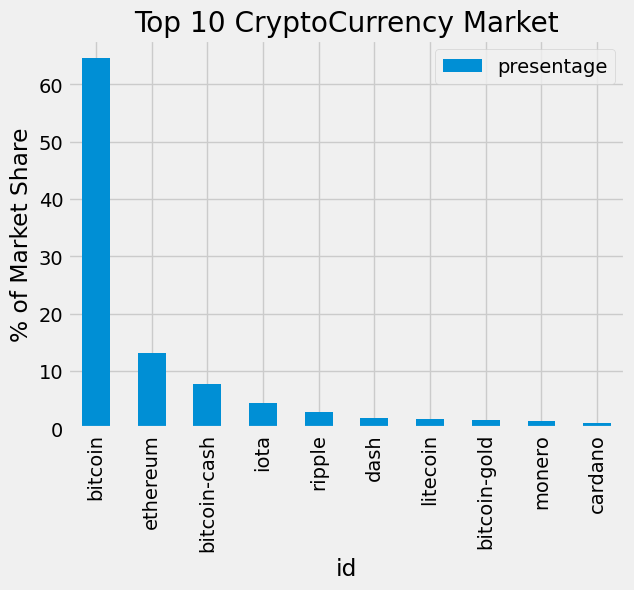

In [38]:
# Select largest crypto currencies
largest_capital = market_cap_1.sort_values('market_cap_usd',ascending = False)

#Calculate the total market capitalization
largest_10 = largest_capital.head(10)
print(largest_10)

# total market capitalization values
total_largest_10 = largest_10['market_cap_usd'].sum()

#create presentages
presentages = largest_10['market_cap_usd'].apply(lambda x:x /total_largest_10 *100)

#Add prsentages into dataframe
largest_10_with_presentage = largest_10.assign(presentage = presentages)
largest_10_with_presentage.head()

# Declaring Labels &  Create a Barplot 
Top_Title = 'Top 10 CryptoCurrency Market'
Top_Ylable = '% of Market Share'
chart = largest_10_with_presentage.plot.bar(x='id',y='presentage',title=Top_Title)
chart.set_ylabel(Top_Ylable)





**5. Making the plot easier to read and more informative**

While the plot above is informative enough, it can be improved. Bitcoin is too big, and the other coins are hard to distinguish because of this. Instead of the percentage, let's use a log10 scale of the "raw" capitalization. Plus, let's use color to group similar coins and make the plot more informative1.

For the colors rationale: bitcoin-cash and bitcoin-gold are forks of the bitcoin blockchain2. Ethereum and Cardano both offer Turing Complete smart contracts. Iota and Ripple are not minable. Dash, Litecoin, and Monero get their own color.

1 This coloring is a simplification. There are more differences and similarities that are not being represented here.

2 The bitcoin forks are actually very different, but it is out of scope to talk about them here. Please see the warning above and do your own research.



Text(0.5, 0, '')

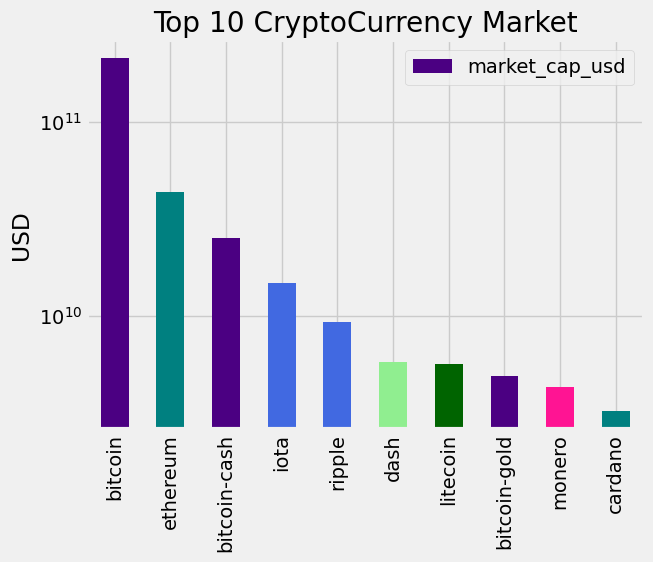

In [49]:
#Add colors for the bar plot
colors = ['indigo','teal','indigo','royalblue','royalblue','lightgreen','darkgreen','indigo','deeppink','teal']
chart2 = largest_10_with_presentage.plot.bar(x='id',y='market_cap_usd',logy=True,color=colors,title=Top_Title)
chart2.set_ylabel('USD')
chart2.set_xlabel('')